# Business Case Study: Employee Absenteeism

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.



# The business Task

The exercise will address `Absenteeism` at a company during work time.

**Problem:** 
The problem is that the work environment of today is more:
- Competitive
- Managers set unachievable business goals
- have an elevated risk of becoming unemployed
This can be lead to an increase in pressure and stress of the employee. Those factors influence employee health, which is of course indesirable.

### What is Absenteeism?
Absence from work during normal working hours resulting in temporary incapacity to execute a regular working activity.

- Based on what information should we predict whether an employee is expected to be absent or not?
- How should we measure absenteeism?

### Purpose of the business exercise:

Explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not.

We want to know for how many working hours any employee could be away from work based on information like:
- How far they live from their workplace.
- How many children and pets they have.
- Do they have higher education?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

In [2]:
data = pd.read_csv('data/Absenteeism_data.csv')
data.columns = ['id', 'abs_reason', 'date', 'trans_exp', 'work_dist', 'age', 'daily_work_avg', 
                'body_mass_ind', 'educ', 'child', 'pets', 'abs_time']
data.head()

,id,abs_reason,date,trans_exp,work_dist,age,daily_work_avg,body_mass_ind,educ,child,pets,abs_time
0,11,26,07/07/2015,289,36,33,239.55,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.55,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.55,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.55,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.55,30,1,2,1,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              700 non-null    int64  
 1   abs_reason      700 non-null    int64  
 2   date            700 non-null    object 
 3   trans_exp       700 non-null    int64  
 4   work_dist       700 non-null    int64  
 5   age             700 non-null    int64  
 6   daily_work_avg  700 non-null    float64
 7   body_mass_ind   700 non-null    int64  
 8   educ            700 non-null    int64  
 9   child           700 non-null    int64  
 10  pets            700 non-null    int64  
 11  abs_time        700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


The data doesn't have any missing values.

In [4]:
data.describe()

,id,abs_reason,trans_exp,work_dist,age,daily_work_avg,body_mass_ind,educ,child,pets,abs_time
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,17.95,19.41,222.35,29.89,36.42,271.80,26.74,1.28,1.02,0.69,6.76
std,11.03,8.36,66.31,14.80,6.38,40.02,4.25,0.67,1.11,1.17,12.67
min,1.00,0.00,118.00,5.00,27.00,205.92,19.00,1.00,0.00,0.00,0.00
25%,9.00,13.00,179.00,16.00,31.00,241.48,24.00,1.00,0.00,0.00,2.00
50%,18.00,23.00,225.00,26.00,37.00,264.25,25.00,1.00,1.00,0.00,3.00
75%,28.00,27.00,260.00,50.00,40.00,294.22,31.00,1.00,2.00,1.00,8.00
max,36.00,28.00,388.00,52.00,58.00,378.88,38.00,4.00,4.00,8.00,120.00


In [5]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Max: {data[column].max()}")
    print(f"Min: {data[column].min()}")

===============Column: id==============
Number of unique values: 34
Max: 36
Min: 1
===============Column: abs_reason==============
Number of unique values: 28
Max: 28
Min: 0
===============Column: date==============
Number of unique values: 432
Max: 31/10/2017
Min: 01/01/2018
===============Column: trans_exp==============
Number of unique values: 24
Max: 388
Min: 118
===============Column: work_dist==============
Number of unique values: 24
Max: 52
Min: 5
===============Column: age==============
Number of unique values: 21
Max: 58
Min: 27
===============Column: daily_work_avg==============
Number of unique values: 35
Max: 378.884
Min: 205.917
===============Column: body_mass_ind==============
Number of unique values: 16
Max: 38
Min: 19
===============Column: educ==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: child==============
Number of unique values: 5
Max: 4
Min: 0
===============Column: pets==============
Number of unique values: 6
Max: 8
Min: 0
====

In [6]:
data.columns

Index(['id', 'abs_reason', 'date', 'trans_exp', 'work_dist', 'age',
       'daily_work_avg', 'body_mass_ind', 'educ', 'child', 'pets', 'abs_time'],
      dtype='object')

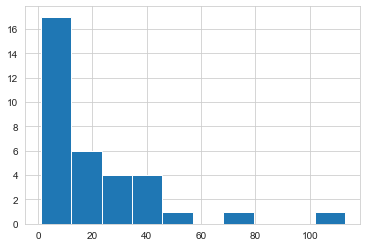

In [7]:
data['id'].value_counts().hist()

`ID`: individual identification (in this case we have 34 employees) indicates precisely who has been away during working hours.  Will this information improve our analysis in any way? No, because it's only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information).

So we are going to drop this column

In [8]:
data.drop('id', axis=1, inplace=True)

`Reason for Absence`: We have `28` reason of absence from `0` to `28`.

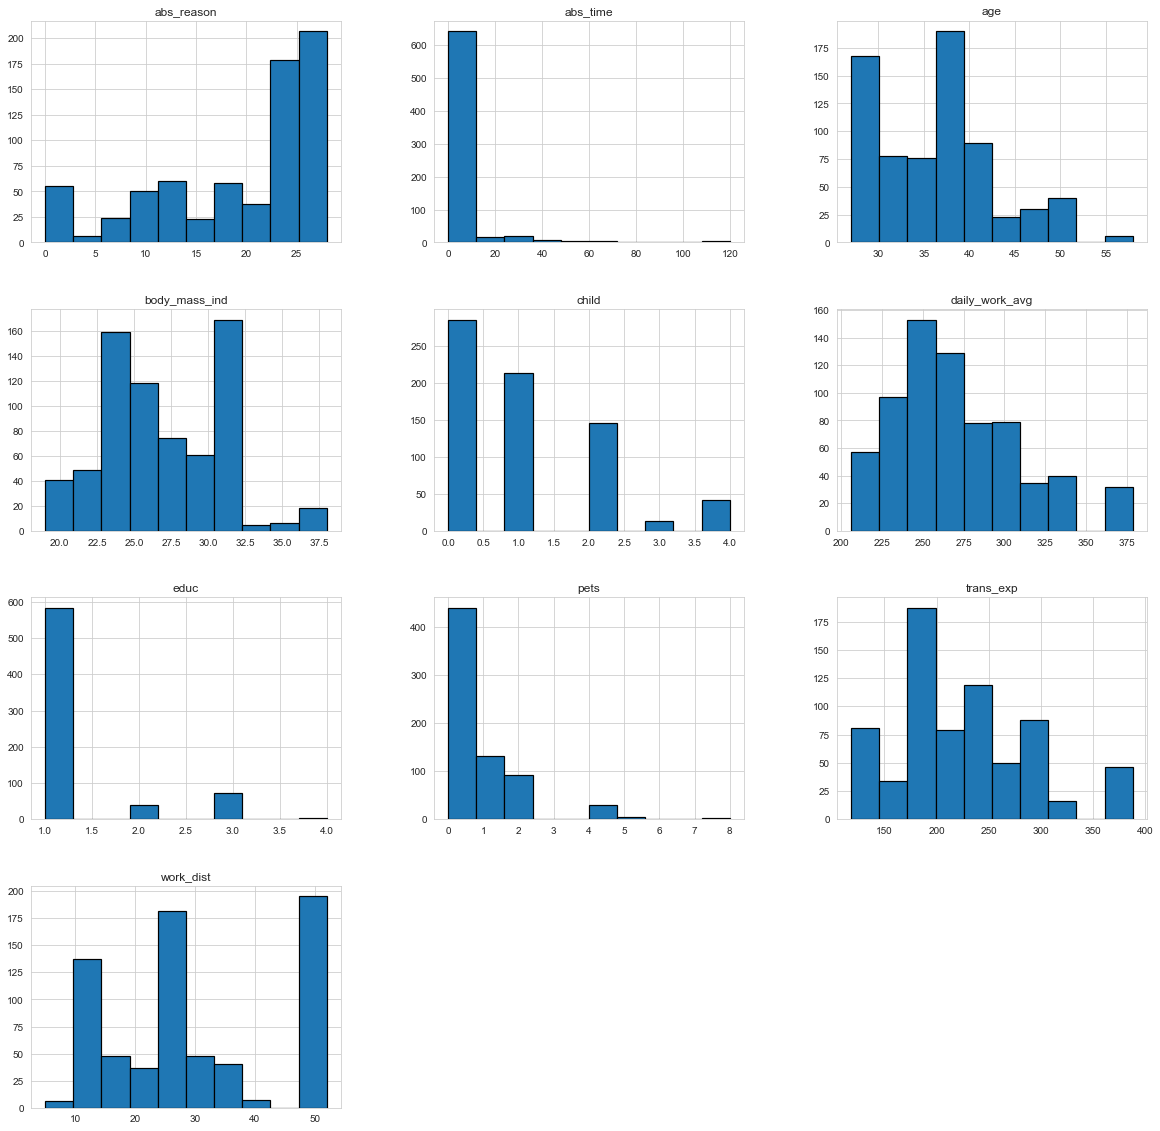

In [9]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [10]:
print(f"{data.abs_time.value_counts()}")
print(f"{data.abs_time.value_counts()[0] / data.abs_time.value_counts()[1]}")

8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
40       7
5        7
32       6
64       3
112      2
56       2
80       2
120      2
48       1
7        1
104      1
Name: abs_time, dtype: int64
0.4482758620689655


In [11]:
data.abs_reason.value_counts()

23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
6       6
21      6
8       5
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: abs_reason, dtype: int64

In [12]:
data["abs_reason"] = data["abs_reason"].map({0: "Group_1", 1: "Group_1", 2: "Group_1", 
                                             3: "Group_1", 4: "Group_1", 5: "Group_1", 
                                             6: "Group_1", 7: "Group_1", 8: "Group_1", 
                                             9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 
                                             15: "Group_2", 16: "Group_2", 17: "Group_2", 
                                             17: "Group_2", 18: "Group_3", 19: "Group_3", 
                                             20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 
                                             26: "Group_4", 27: "Group_4", 28: "Group_4"})
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["abs_reason"].value_counts()

Group_4    418
Group_1    213
Group_3     63
Group_2      6
Name: abs_reason, dtype: int64

In [13]:
data_1 = pd.get_dummies(data, columns=['abs_reason'])

In [14]:
data_1.head()

,date,trans_exp,work_dist,age,daily_work_avg,body_mass_ind,educ,child,pets,abs_time,abs_reason_Group_1,abs_reason_Group_2,abs_reason_Group_3,abs_reason_Group_4
0,07/07/2015,289,36,33,239.55,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.55,31,1,1,0,0,1,0,0,0
2,15/07/2015,179,51,38,239.55,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.55,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.55,30,1,2,1,2,0,0,0,1


In [15]:
data_1.dtypes

date                   object
trans_exp               int64
work_dist               int64
age                     int64
daily_work_avg        float64
body_mass_ind           int64
educ                    int64
child                   int64
pets                    int64
abs_time                int64
abs_reason_Group_1      uint8
abs_reason_Group_2      uint8
abs_reason_Group_3      uint8
abs_reason_Group_4      uint8
dtype: object

In [16]:
data_1["date"] = pd.to_datetime(data_1.date)

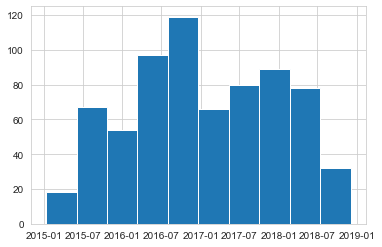

In [17]:
data_1.date.hist()

In [18]:
data_1['Month'] = data_1.date.dt.month
data_1.head()

,date,trans_exp,work_dist,age,daily_work_avg,body_mass_ind,educ,child,pets,abs_time,abs_reason_Group_1,abs_reason_Group_2,abs_reason_Group_3,abs_reason_Group_4,Month
0,2015-07-07,289,36,33,239.55,30,1,2,1,4,0,0,0,1,7
1,2015-07-14,118,13,50,239.55,31,1,1,0,0,1,0,0,0,7
2,2015-07-15,179,51,38,239.55,31,1,0,0,2,0,0,0,1,7
3,2015-07-16,279,5,39,239.55,24,1,2,0,4,1,0,0,0,7
4,2015-07-23,289,36,33,239.55,30,1,2,1,2,0,0,0,1,7


In [19]:
data_1["Weekday"] = data_1.date.dt.weekday
data_1["Weekday"]

0      1
1      1
2      2
3      3
4      3
      ..
695    2
696    2
697    3
698    3
699    3
Name: Weekday, Length: 700, dtype: int64

In [20]:
data_1.dtypes

date                  datetime64[ns]
trans_exp                      int64
work_dist                      int64
age                            int64
daily_work_avg               float64
body_mass_ind                  int64
educ                           int64
child                          int64
pets                           int64
abs_time                       int64
abs_reason_Group_1             uint8
abs_reason_Group_2             uint8
abs_reason_Group_3             uint8
abs_reason_Group_4             uint8
Month                          int64
Weekday                        int64
dtype: object

In [21]:
data_1["educ"] = data_1.educ.map({1: 0, 2: 1, 3: 1, 4: 1})

In [22]:
data_1.educ.value_counts()

0    583
1    117
Name: educ, dtype: int64

In [23]:
data_1.drop('date', axis=1, inplace=True)

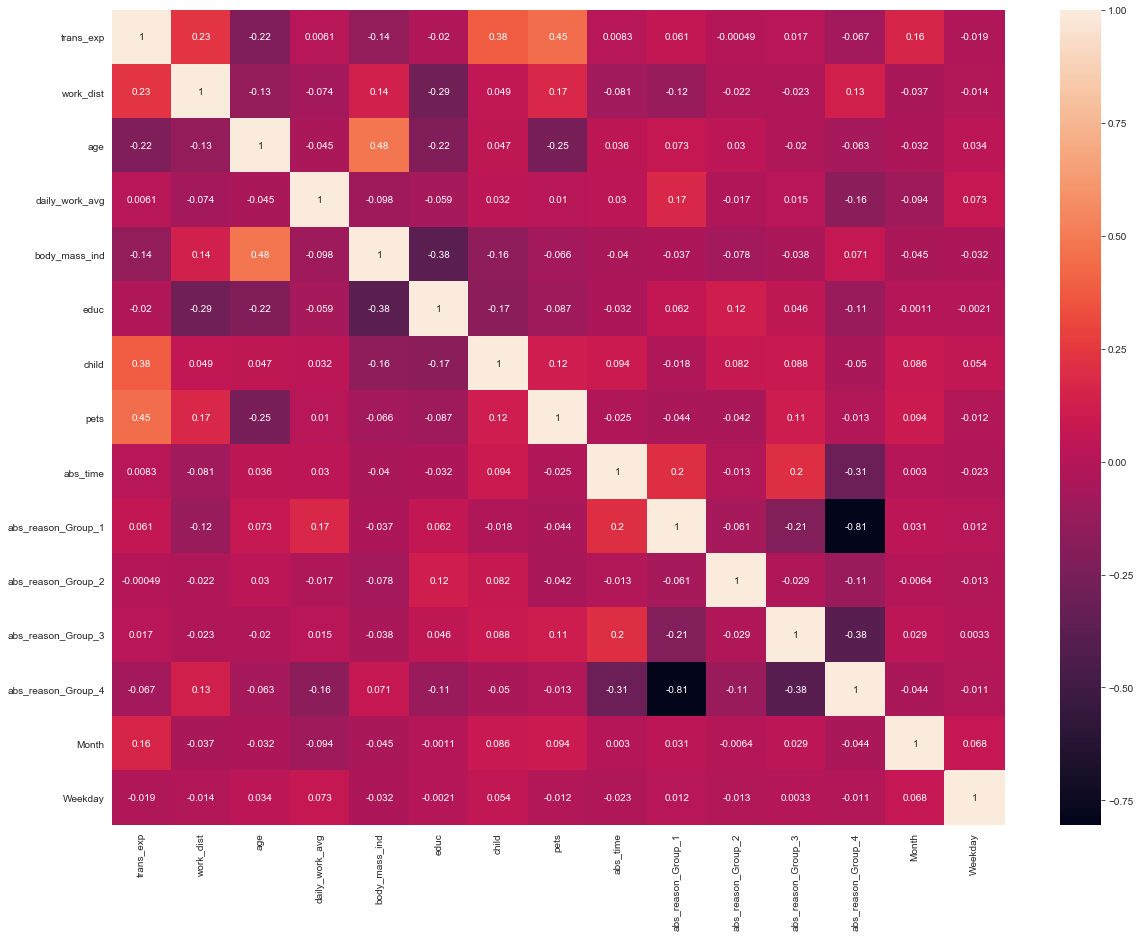

In [24]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_1.corr(), annot=True)

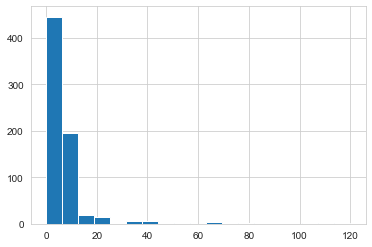

In [25]:
data_1['abs_time'].hist(bins=data_1['abs_time'].nunique())

In [26]:
data_1.abs_time.value_counts().sort_index()

0       39
1       87
2      149
3      106
4       57
5        7
7        1
8      195
16      18
24      15
32       6
40       7
48       1
56       2
64       3
80       2
104      1
112      2
120      2
Name: abs_time, dtype: int64

# Applying machine learning algorthims

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score

X = data_1.drop('abs_time', axis=1)
y = np.where(data_1["abs_time"] > data_1["abs_time"].median(), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [29]:
X_train.dtypes

trans_exp               int64
work_dist               int64
age                     int64
daily_work_avg        float64
body_mass_ind           int64
educ                    int64
child                   int64
pets                    int64
abs_reason_Group_1      uint8
abs_reason_Group_2      uint8
abs_reason_Group_3      uint8
abs_reason_Group_4      uint8
Month                   int64
Weekday                 int64
dtype: object

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l2')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(lr_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 71.84%
_______________________________________________
Classification Report:	Precision Score: 71.21%
			Recall Score: 63.51%
			F1 score: 67.14%
_______________________________________________
Confusion Matrix: 
 [[211  57]
 [ 81 141]]

Test Result:
Accuracy Score: 69.05%
_______________________________________________
Classification Report:	Precision Score: 69.05%
			Recall Score: 59.79%
			F1 score: 64.09%
_______________________________________________
Confusion Matrix: 
 [[87 26]
 [39 58]]



### Cross Validation Score for Logistic Regression

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X, y, cv=5)
print(list(scores))
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.7642857142857142, 0.5714285714285714, 0.6857142857142857, 0.55, 0.7714285714285715]
Logistic Accuracy: 66.86% +/- (9.33)


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1500)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.78%
_______________________________________________
Classification Report:	Precision Score: 99.09%
			Recall Score: 98.20%
			F1 score: 98.64%
_______________________________________________
Confusion Matrix: 
 [[266   2]
 [  4 218]]

Test Result:
Accuracy Score: 70.48%
_______________________________________________
Classification Report:	Precision Score: 67.33%
			Recall Score: 70.10%
			F1 score: 68.69%
_______________________________________________
Confusion Matrix: 
 [[80 33]
 [29 68]]



In [33]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {'n_estimators':[100, 500, 1000, 1500],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"], 
              'bootstrap':[True, False]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
# rf_grid_cv.fit(X_train, y_train)

In [34]:
# rf_grid_cv.best_estimator_

In [35]:
rf_clf = RandomForestClassifier(criterion='gini',
                                max_depth=10,
                                min_samples_leaf=3, 
                                min_samples_split=3,
                                n_estimators=100, 
                                bootstrap=True)

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.92%
_______________________________________________
Classification Report:	Precision Score: 86.26%
			Recall Score: 81.98%
			F1 score: 84.06%
_______________________________________________
Confusion Matrix: 
 [[239  29]
 [ 40 182]]

Test Result:
Accuracy Score: 70.95%
_______________________________________________
Classification Report:	Precision Score: 68.00%
			Recall Score: 70.10%
			F1 score: 69.04%
_______________________________________________
Confusion Matrix: 
 [[81 32]
 [29 68]]



### Cross Validation Score for Random Forest Classifier

In [36]:
scores = cross_val_score(rf_clf, X, y, cv=3, scoring='accuracy')
print(list(scores))
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.7264957264957265, 0.6437768240343348, 0.6652360515021459]
Random Forest F1_score: 67.85% +/- (3.50)


## XGBoost Classifier

In [37]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.67%
_______________________________________________
Classification Report:	Precision Score: 83.49%
			Recall Score: 79.73%
			F1 score: 81.57%
_______________________________________________
Confusion Matrix: 
 [[233  35]
 [ 45 177]]

Test Result:
Accuracy Score: 67.62%
_______________________________________________
Classification Report:	Precision Score: 65.93%
			Recall Score: 61.86%
			F1 score: 63.83%
_______________________________________________
Confusion Matrix: 
 [[82 31]
 [37 60]]



In [39]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = XGBClassifier()

hyperparameter_grid = {'colsample_bytree': [ 0.5, 0.75, 0.85, 0.9, 1], 
                       'colsample_bylevel': [ 0.5, 0.75, 0.85, 0.9, 1],
                       'colsample_bynode': [ 0.5, 0.75, 0.85, 0.9, 1],
                       'learning_rate' : [0.01, 0.5, 0.1], 
                       'n_estimators': [100, 350, 500],
                       'min_child_weight' : [2, 3, 5, 10],
                       'max_depth': [3, 5, 10, 15], 
                       'base_score' : [0.1, 0.5, 0.9]
                      }

xgb_grid_cv = GridSearchCV(xgb_clf, hyperparameter_grid, scoring="accuracy", 
                           n_jobs=-1, verbose=1, cv=3)
# xgb_grid_cv.fit(X_train, y_train)

In [40]:
# xgb_grid_cv.best_estimator_

In [41]:
xgb_clf = XGBClassifier(base_score=0.1, 
                        min_child_weight=2,
                        max_depth=15,
                        colsample_bytree=0.75,
                        colsample_bylevel=0.5,
                        colsample_bynode=0.5,
                        learning_rate=0.1, 
                        n_estimators=100)

xgb_clf.fit(X_train, y_train)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.39%
_______________________________________________
Classification Report:	Precision Score: 89.72%
			Recall Score: 86.49%
			F1 score: 88.07%
_______________________________________________
Confusion Matrix: 
 [[246  22]
 [ 30 192]]

Test Result:
Accuracy Score: 70.48%
_______________________________________________
Classification Report:	Precision Score: 67.68%
			Recall Score: 69.07%
			F1 score: 68.37%
_______________________________________________
Confusion Matrix: 
 [[81 32]
 [30 67]]



### Cross Validation Score for XGBoost Classifier

In [43]:
scores = cross_val_score(xgb_clf, X, y, cv=3, scoring='accuracy')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.64957265 0.54935622 0.64377682]
XGBoost F1_score: 61.42% +/- (4.59)


# Save the model

In [44]:
import pickle

with open('model', 'wb') as file:
    pickle.dump(xgb_clf, file)